# Informe — Entrega 1: Detección en tiempo real de movimientos humanos

**Proyecto:** AI_DetectionOfMovements — APOIII

**Fecha:** Octubre 17, 2025

### Integrantes:

- Ricardo Andrés Chamorro Martinez
- Diego Armando Polanco Lozano
- Oscar Stiven Muñoz Ramirez

## 1. Caso de estudio

### Objetivo

Desarrollar una herramienta de software capaz de analizar actividades específicas de una persona (caminar hacia la cámara, caminar de regreso, girar, sentarse y ponerse de pie) mediante el uso de visión por computadora y modelos de aprendizaje automático. El sistema deberá identificar en tiempo real la actividad que realiza una persona y analizar aspectos posturales relevantes como la inclinación del tronco y el movimiento de articulaciones clave (muñecas, rodillas, caderas, hombros y cabeza).

### Contexto

El análisis automático de movimientos humanos se ha convertido en una herramienta clave en áreas como la salud, la ergonomía, el deporte y la seguridad. Tradicionalmente, este tipo de seguimiento requería equipos costosos o sensores corporales especializados. Sin embargo, el avance de técnicas de pose estimation como MediaPipe y OpenPose ha permitido realizar mediciones de alta precisión usando únicamente una cámara estándar.

Este proyecto propone aprovechar estas tecnologías para crear un sistema ligero, interpretable y adaptable, capaz de procesar videos en tiempo real. Su valor radica en que puede ofrecer información objetiva sobre el movimiento humano sin la necesidad de hardware complejo, abriendo la posibilidad de aplicaciones en rehabilitación física, monitoreo postural o incluso control de interfaces humanas.

### Resumen ejecutivo

Se presenta una solución práctica y reproducible para la **detección en tiempo real** de 8 acciones humanas: *caminar hacia la cámara, caminar de regreso, girar/voltearse, estar sentado, sentarse, estar de pie, levantarse* y *ruido/transiciones*. El dataset inicial (18 videos, 10.380 frames) fue procesado con **MediaPipe Pose** (33 landmarks) y enriquecido con features espaciales y temporales (dataset final: 10.380 × 184 columnas). El EDA muestra alta calidad de keypoints (visibilidad promedio 94.13%) y una distribución razonable de clases. El pipeline propuesto cubre captura, estimación de pose, feature engineering, modelado secuencial y evaluación tanto en precisión como en latencia para uso en tiempo real.

## 2. Objetivo y Preguntas de Interés

### Objetivo General

Desarrollar una herramienta capaz de identificar en tiempo real la actividad que realiza una persona entre las clases definidas, y entregar medidas posturales relevantes (inclinación del tronco, ángulos de rodilla, cadera, hombros y muñecas).

### Preguntas Orientadoras (Respondidas)

* **¿La metodología propuesta es clara, reproducible y adecuada para el problema real-time?**  
  **Respuesta:** Sí — pipeline CRISP-DM adaptado + validación por sujeto.

* **¿Las transformaciones de los datos y el EDA fueron suficientes para preparar modelos temporales?**  
  **Respuesta:** Sí — 184 features, visualización y verificación en video con skeleton overlays.

* **¿Qué características son las más discriminantes y cómo afecta la variabilidad entre sujetos?**  
  **Respuesta:** Velocidad del centro, rotación de torso, distancia cabeza–cadera, ángulos cadera–rodilla; se observó posible variabilidad por altura y velocidad que requiere normalización y validación por sujeto.

* **¿Las soluciones propuestas son apropiadas e interpretables para el contexto?**  
  **Respuesta:** Sí — modelos baselines interpretables y modelos temporales para secuencias; además se proponen medidas éticas y de privacidad.

### Contexto del Proyecto

El análisis automático de movimientos humanos se ha convertido en una herramienta clave en áreas como la salud, la ergonomía, el deporte y la seguridad. Tradicionalmente, este tipo de seguimiento requería equipos costosos o sensores corporales especializados. Sin embargo, el avance de técnicas de pose estimation como MediaPipe y OpenPose ha permitido realizar mediciones de alta precisión usando únicamente una cámara estándar.

Este proyecto propone aprovechar estas tecnologías para crear un sistema ligero, interpretable y adaptable, capaz de procesar videos en tiempo real. Su valor radica en que puede ofrecer información objetiva sobre el movimiento humano sin la necesidad de hardware complejo, abriendo la posibilidad de aplicaciones en rehabilitación física, monitoreo postural o incluso control de interfaces humanas.

### Requerimientos Técnicos

**Entradas:**
- Video en tiempo real capturado por cámara web o videos previamente grabados

**Procesamiento:**
- Extracción de coordenadas de articulaciones con MediaPipe Pose (33 landmarks)
- Cálculo de ángulos e inclinaciones corporales
- Feature engineering espacial y temporal

**Salidas:**
- Clasificación de la actividad en tiempo real
- Visualización del esqueleto estimado
- Cálculo de inclinaciones y movimientos de articulaciones clave
- Medidas posturales (ángulos de rodilla, cadera, hombros, muñecas)

**Visualización:**
- Interfaz que muestre la actividad detectada junto con los ángulos principales
- Overlay del esqueleto sobre el video original
- Métricas de confianza y latencia

## 3. Tipo de Problema

### Definición y Estructura

El proyecto aborda un problema de **clasificación supervisada** dentro del campo de la visión por computadora y aprendizaje automático. El objetivo es predecir la etiqueta de actividad que corresponde a una secuencia de posiciones articulares.

**Estructura del problema:**

* **Dominio:** Visión por computadora + aprendizaje automático
* **Tarea:** Clasificación supervisada de secuencias (Human Activity Recognition) en **modo online**
* **Entrada:** Secuencias de landmarks 2D/3D (MediaPipe Pose — 33 puntos) por frame
* **Salida:** Etiqueta de actividad por frame o por ventana temporal

### Justificación

El reconocimiento de actividades humanas es una tarea clásica en la visión por computadora. En este caso, se busca resolverla con un enfoque eficiente y accesible, priorizando la interpretabilidad de los datos frente a arquitecturas profundas más costosas. El uso de MediaPipe permite procesamiento en tiempo real con hardware convencional, lo que facilita el despliegue en diversos contextos aplicados.

## 4. Metodología (Pipeline Detallado)

### Enfoque CRISP-DM Adaptado

El desarrollo del proyecto se guiará por la metodología CRISP-DM (Cross-Industry Standard Process for Data Mining), adaptada al contexto de visión del analisis por computadora y clasificación de movimiento humano. Esta metodología permite estructurar el trabajo en seis fases: comprensión del problema, comprensión de los datos, preparación, modelado y evaluación.

### 4.1. Ingesta y Captura

* Captura por cámara web o lectura de video pregrabado
* Unificación de framerate (FPS) y control de timestamps para sincronización temporal
* Gestión de flujo continuo de datos para procesamiento en tiempo real

### 4.2. Detección de Pose

* **MediaPipe Pose** para extraer 33 landmarks con scores de visibilidad por frame
* Drop o interpolación de frames con detección fallida
* Validación de calidad de detección mediante umbral de visibilidad

### 4.3. Preprocesamiento y Normalización

* **Centrado:** Normalización de coordenadas respecto a pelvis/cadera
* **Escalado:** Por altura corporal (head-to-ankle) para invariancia a distancia de la cámara
* **Suavizado temporal:** Moving average o filtro Savitzky–Golay para reducir ruido en derivadas
* **Imputación:** Interpolación lineal para pequeños lapsos sin detección
* **Anonimización:** Opción de almacenar solo landmarks (no video) para garantizar privacidad

### 4.4. Feature Engineering

**Características Espaciales (estáticas):**
* Ángulos articulares: hombro–codo–muñeca, cadera–rodilla–tobillo
* Distancias normalizadas: cabeza–cadera, apertura de piernas/brazos
* Área del convex-hull del cuerpo
* Relaciones de proporciones corporales

**Características Temporales (dinámicas):**
* Velocidad y aceleración por articulación
* Energía cinética (∑v²)
* Suavidad del movimiento (varianza de aceleración)
* Dirección dominante del movimiento (vectores de desplazamiento)
* Rotación de torso y cabeza
* FFT de movimiento de pies para detectar frecuencia de paso

**Características Globales:**
* Simetría izquierda/derecha
* Centro de masa y su trayectoria
* Estabilidad postural

**Resultado:** Dataset final de 184 columnas (33 landmarks × 4 coordenadas + 20 features derivadas clave)

### 4.5 Preparación de Datos (detalle operativo)

Antes de las etapas de preprocesamiento y feature engineering se aplica una fase de preparación de datos orientada a asegurar coherencia, trazabilidad y calidad en el dataset. Esta fase incluye las siguientes acciones:

- Filtrado y limpieza: eliminación de frames con detección fallida o visibilidad por debajo de un umbral; marcado de frames ambiguos como "unlabeled" para revisión manual.
- Manejo de faltantes: interpolación lineal para gaps cortos (< 5 frames) y desestimación o imputación por vecino temporal para lapsos mayores; registro de la cantidad de interpolaciones por video para trazabilidad.
- Normalización espacial inicial: recorte de outliers en coordenadas (por valores fuera de rango), centrado preliminar respecto a la pelvis y reescalado por una medida antropométrica (head-to-ankle) para que las señales sean comparables entre sujetos.
- Segmentación temporal y etiquetado: definición de ventanas (p.ej., 30–60 frames) con solapamiento del 50% y asignación de etiquetas por mayoría dentro de la ventana; manejo especial de transiciones cortas para preservar eventos rápidos (padding o ventanas adaptativas).
- Balanceo y muestreo: planificación de oversampling en clases minoritarias (SMOTE temporal o replicación con augmentations temporales) y uso de pesos de clase durante el entrenamiento para mitigar desbalance.
- Verificación y calidad: generación de estadísticas por video (porcentaje de frames interpolados, visibilidad media, número de transiciones detectadas) y revisión visual mediante skeleton-overlays para confirmar la coherencia de las transformaciones.

Estas tareas garantizan que el dataset entregado al bloque de preprocesamiento y feature engineering sea robusto, reproducible y documentado, reduciendo el riesgo de sesgos por datos faltantes o inconsistentes.

### 4.6. Modelado

**Modelos Baseline:**
* Random Forest: robusto ante ruido, con buena interpretabilidad
* XGBoost: potente para features agregados por ventana temporal
* SVM: eficaz en espacios de alta dimensión

**Modelos Temporales (para secuencias):**
* LSTM/GRU: capturan dependencias temporales largas
* 1D-CNN temporal: patrones locales en secuencias
* Transformer temporal: atención sobre toda la secuencia
* TCN (Temporal Convolutional Network): alternativa eficiente

**Estrategia de entrenamiento:**
* Validación por sujeto (leave-one-subject-out) para evaluar generalización
* K-fold temporal (k=5) para evitar fuga de información temporal
* Early stopping y regularización
* Balanceo de clases mediante pesos en la función de pérdida
* Búsqueda de hiperparámetros con Optuna o Bayesian Optimization

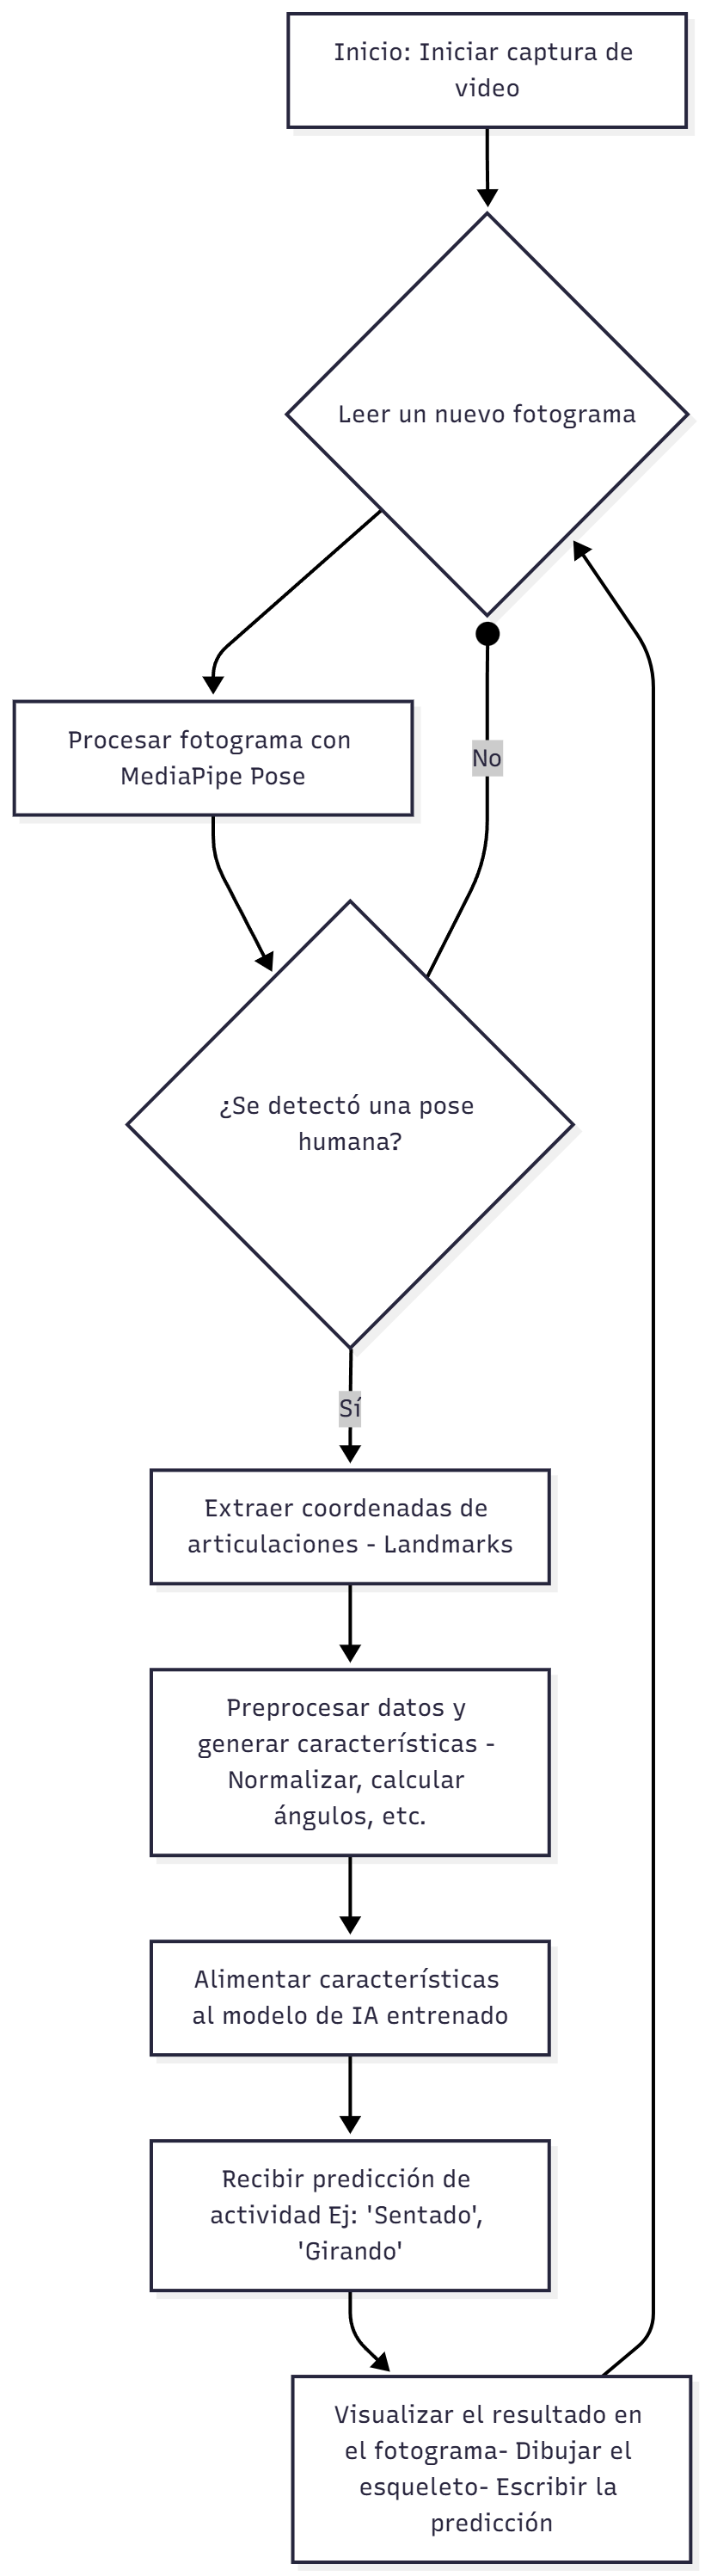

In [ ]:
# Visualización del diagrama de flujo del sistema
from IPython.display import Image, display

# Mostrar imagen del diagrama
display(Image(filename='diagrama.png', width=500))

**Figura 1. Diagrama de flujo del sistema**

El diagrama muestra el flujo lógico del sistema desde la captura del video hasta la visualización de la predicción. El proceso inicia con la lectura de cada fotograma, seguido del procesamiento mediante MediaPipe Pose. Si se detecta una pose humana, se extraen los 33 landmarks (puntos articulares), se preprocesan los datos (normalización, centrado y cálculo de features espaciales y temporales) y se envían al modelo de clasificación. Finalmente, la predicción se representa visualmente sobre el video con el esqueleto superpuesto y la actividad detectada.

## 5. Métricas de Evaluación y Criterios de Aceptación

### Métricas Principales de Clasificación

#### 1. Accuracy (Exactitud)

Mide la proporción total de predicciones correctas. Permite conocer de manera general qué tan bien el modelo identifica las actividades humanas.

$$Accuracy = \frac{TP + TN}{TP + TN + FP + FN}$$

#### 2. Precision (Precisión)

Indica qué porcentaje de las predicciones positivas fueron realmente correctas. Útil para evaluar el costo de falsos positivos.

$$Precision = \frac{TP}{TP + FP}$$

#### 3. Recall (Sensibilidad)

Mide la capacidad del modelo para identificar correctamente todos los casos positivos de una clase. Evalúa qué tan bien el sistema detecta una actividad cuando realmente ocurre.

$$Recall = \frac{TP}{TP + FN}$$

#### 4. F1-Score

Media armónica entre precisión y recall, proporcionando una métrica equilibrada. Especialmente útil cuando hay diferencias en la frecuencia de las clases.

$$F1 = 2 \times \frac{Precision \times Recall}{Precision + Recall}$$

Se calculará **F1-macro** (promedio no ponderado) y **F1-weighted** (ponderado por frecuencia de clase).

#### 5. Matriz de Confusión

Representa visualmente las predicciones correctas e incorrectas para cada clase. Permite identificar qué actividades son más propensas a confundirse entre sí (ej: "sit_down" vs "sitting", "walk_forward" vs "walk_backward").

### Métricas de Rendimiento en Tiempo Real

#### 6. Latencia por Frame

Tiempo promedio que tarda el modelo en procesar un fotograma y generar una predicción (en milisegundos). Evalúa si el sistema es suficientemente rápido para uso en vivo.

**Objetivo:** < 50-100 ms por frame

#### 7. Frames por Segundo (FPS)

Mide el rendimiento del pipeline completo (captura + detección + preprocesamiento + predicción). Una tasa estable y alta garantiza experiencia fluida.

**Objetivo:** ≥ 10 FPS (idealmente ≥ 15 FPS)

### Criterios de Aceptación

**Fase de desarrollo:**
* F1-macro ≥ 0.80 en validación cruzada
* F1-weighted ≥ 0.85
* Latencia por frame < 100 ms en hardware objetivo

**Fase de producción:**
* F1-macro ≥ 0.85
* Performance consistente entre sujetos (desviación estándar < 0.10)
* Procesamiento en tiempo real ≥ 15 FPS

## 6. Datos Recolectados (Estado Actual)

### Características del Dataset

| Característica | Valor |
|---|---|
| **Videos totales** | 18 |
| **Detector de pose** | MediaPipe Pose |
| **Landmarks por frame** | 33 puntos (x, y, z, visibility) |
| **Clases de actividades** | 8 |
| **Herramienta de anotación** | Label Studio |
| **Dataset original** | `mediapipe_labels_dataset_enriched.csv` |
| **Dataset con features derivadas** | `mediapipe_labels_dataset_with_derived_features.csv` |
| **Dimensiones finales** | 10,380 frames × 184 columnas |

### Proceso de Recolección y Anotación

**Captura de videos:**
* Videos grabados por el equipo de trabajo en entorno controlado
* Participantes realizando las 8 actividades objetivo de forma natural
* Grabación con cámara estándar (sin hardware especializado)
* Iluminación y fondo consistentes para minimizar ruido

**Anotación temporal con Label Studio:**
* Uso de **Label Studio** como plataforma de anotación de video
* Anotación basada en rangos temporales (time ranges) por actividad
* Interfaz de video timeline para marcar inicio y fin de cada acción
* Exportación en formato JSON con timestamps precisos
* Validación cruzada de anotaciones entre miembros del equipo

**Extracción de landmarks:**
* Procesamiento de videos con **MediaPipe Pose** (Python SDK)
* Extracción frame por frame de 33 landmarks (x, y, z, visibility)
* Sincronización de timestamps entre anotaciones de Label Studio y frames de MediaPipe
* Generación de dataset CSV con landmarks y etiquetas alineadas temporalmente

**Control de calidad:**
* Verificación visual mediante videos con skeleton overlay
* Validación de visibilidad de landmarks (score > 0.5)
* Identificación y manejo de frames con detección parcial o fallida
* Filtrado de segmentos con ruido o etiquetas ambiguas

### Distribución de Clases

| Actividad | Frames | Porcentaje | Observación |
|---|---:|---:|---|
| **Walk forward** | 2,275 | 21.92% | Clase dominante |
| **Turn** | 1,800 | 17.34% | Bien representada |
| **Walk backward** | 1,578 | 15.20% | Bien representada |
| **Get up** | 1,468 | 14.14% | Transición importante |
| **Sitting** | 1,274 | 12.27% | Postura estática |
| **Sit down** | 1,018 | 9.81% | Transición rápida |
| **Standing** | 919 | 8.85% | Postura estática |
| **Unlabeled** | 48 | 0.46% | Ruido mínimo |

### Calidad de Detección de Landmarks

**Métricas de visibilidad:**
* **Visibilidad promedio:** 94.13% (calidad excepcional)
* **Landmarks visibles promedio:** 32.3 / 33
* **Landmarks con visibilidad alta (>90%):** 23 / 33 (69.7%)
* **Landmarks con visibilidad media (70-90%):** 10 / 33 (30.3%)
* **Landmarks con visibilidad baja (<70%):** 0 / 33 (0%)

**Interpretación:**
La alta visibilidad promedio de 94.13% indica que MediaPipe Pose logró detectar de manera confiable casi todos los puntos articulares en la mayoría de los frames. La ausencia de landmarks con visibilidad baja sugiere que las condiciones de grabación (iluminación, ángulo de cámara, contraste) fueron adecuadas para una detección robusta. Los 10 landmarks con visibilidad media corresponden principalmente a extremidades distales (dedos de manos y pies) y puntos faciales que ocasionalmente quedan ocluidos durante el movimiento.

### Archivos Generados

```
Entrega 1/
├── project-5-at-2025-10-17-02-14-902d1c28.json (anotaciones Label Studio)
├── mediapipe_labels_dataset.csv (landmarks + etiquetas sincronizadas)
├── mediapipe_labels_dataset_enriched.csv (con metadata adicional)
├── mediapipe_labels_dataset_with_derived_features.csv (dataset final para ML)
├── EDA entrega 1.ipynb (análisis exploratorio completo)
├── extract_mediapipe_data.py (script de extracción MediaPipe)
├── videos APO/ (videos originales)
│   └── Videos APO/ (18 videos .mp4)
└── skeleton_videos/ (18 videos de verificación con overlay)
    ├── video_1_with_skeleton.mp4
    ├── video_2_with_skeleton.mp4
    └── ... (18 total)
```

### Pipeline Completo de Generación del Dataset

**1. Captura** → Videos grabados (.mp4)  
**2. Anotación** → Label Studio (time ranges con etiquetas de actividad)  
**3. Extracción** → MediaPipe Pose (33 landmarks × 4 valores por frame)  
**4. Sincronización** → Alineación temporal de landmarks con etiquetas  
**5. Enriquecimiento** → Cálculo de metadata (visibilidad, timestamps, dimensiones)  
**6. Feature Engineering** → 20 características derivadas espaciales y temporales  
**7. Validación** → Generación de videos con skeleton overlay para verificación visual  

**Resultado final:** Dataset de 10,380 frames × 184 columnas listo para modelado supervisado.

## 7. Análisis Exploratorio de Datos (Hallazgos Clave)


### 7.1 Calidad general del dataset

El análisis exploratorio (EDA) muestra que el dataset cuenta con buena calidad técnica para abordar el problema de clasificación de actividades. En total se registraron 10380 frames distribuidos en 18 videos, y la detección de pose se realizó con MediaPipe Pose (33 landmarks por frame). La visibilidad promedio de los landmarks es de 94.13%, lo que indica una detección consistente en la mayoría de los fotogramas. La proporción de frames sin etiqueta es mínima (0.46%), lo que evidencia una buena cobertura en la anotación temporal.

Se observó un desbalance moderado entre clases: la clase más frecuente (walk_forward) representa aproximadamente 21.9% de los frames, mientras que las clases menos frecuentes (por ejemplo, standing) representan alrededor de 8.8%. Este desbalance es manejable pero debe ser considerado durante el entrenamiento mediante técnicas de ponderación o balanceo de clases.

### 7.2 Características discriminantes identificadas

El EDA permitió identificar un conjunto de características derivadas con alta capacidad discriminativa para distinguir las actividades estudiadas. Las principales variables útiles son:

- Velocidad del centro del cuerpo: separa actividades estáticas de dinámicas.
- Rotación del torso: detecta giros y cambios de orientación.
- Distancia vertical cabeza–cadera: indica transiciones verticales (sentarse/levantarse).
- Ángulos de cadera–rodilla–tobillo: distinguen posturas sentado/de pie.
- Energía cinética agregada: discrimina intensidad del movimiento.
- Frecuencia de paso (FFT) aplicada a movimiento de pies: identifica patrones de marcha.
- Medidas de simetría L/R: útil para detectar giros y asimetrías posturales.

### 7.3 Observaciones por clase

- Walk forward / Walk backward: presentan altos valores de velocidad y patrones periódicos claros; su distinción principal viene de la dirección del desplazamiento.
- Turn: caracterizado por incrementos en la rotación del torso y cambios en la dirección del vector de movimiento.
- Sit down / Get up: son transiciones rápidas con pocos frames por evento (habitualmente 10–20 frames), por lo que requieren una estrategia específica para evitar underfitting (ventanas temporales, oversampling, pesos de clase).
- Sitting / Standing: ambas aparecen con baja energía cinética y requieren features espaciales precisas para su separación.

### 7.4 Correlación y redundancia

El análisis de correlación identificó grupos de features con alta correlación (|r| > 0.7), en particular entre medidas de velocidad y energía cinética, y entre diferentes representaciones de simetría corporal y ángulos adyacentes. Esto sugiere que aplicar selección de características o reducción de dimensionalidad (PCA, Lasso, selección por importancia de árboles) puede mejorar eficiencia y generalización.

### 7.5 Variabilidad entre sujetos

Se detectaron fuentes de variabilidad relevantes: diferencias antropométricas (altura), variabilidad en la velocidad de ejecución de las acciones y estilos individuales de movimiento. Estas observaciones sustentan la necesidad de normalización espacial (centrado por pelvis y escalado por altura corporal) y de validación por sujeto (leave-one-subject-out) para evaluar la capacidad de generalización del modelo.

### 7.6 Visualizaciones y verificación

El EDA incluye las siguientes verificaciones visuales y analíticas: distribución de clases, histogramas de visibilidad por landmark, boxplots de features por actividad, matriz de correlación (heatmap), series temporales de velocidad/aceleración y 18 videos con overlay de esqueleto para verificación manual. Estas visualizaciones confirman la consistencia de las anotaciones y la utilidad de las features derivadas.

### 7.7 Conclusiones del EDA

En conjunto, el EDA muestra que el dataset es adecuado para entrenamiento supervisado de modelos temporales y baselines basados en features, siempre que se apliquen normalización robusta y estrategias para tratar clases con pocos ejemplos o eventos de corta duración.

## 8. Estrategias para Conseguir Más Datos (Priorizadas)

### Prioridad 1: Grabaciones Controladas Adicionales

**Objetivo:** 10–50 clips nuevos con énfasis en transiciones y diversidad demográfica

**Plan:**
* Protocolo estandarizado de grabación (ángulo, iluminación, fondo)
* Énfasis en clases minoritarias: "sit_down", "get_up", "standing"
* Diversidad: edad, altura, complexión, ropa, velocidad de ejecución
* Múltiples repeticiones por sujeto para capturar variabilidad natural

### Prioridad 2: Data Augmentation para Pose

**Técnicas aplicables:**
* **Spatial:** Horizontal flipping, jittering de coordenadas, scaling simulado
* **Temporal:** Time warping (estirar/comprimir secuencias), resampling
* **Occlusion simulation:** Randomly hide landmarks para simular obstrucciones

### Prioridad 3: Datasets Públicos

**Candidatos para integración:**
* **NTU RGB+D:** ~60 clases de acciones, pose 3D disponible
* **PoseTrack:** Tracking de pose en videos
* **Human3.6M:** Dataset grande con pose 3D
* **UCF101 / HMDB51:** Acciones humanas (requiere extraer pose)
* **Kinetics:** Videos de acciones (mapear clases relevantes)

**Proceso:** Extraer landmarks con MediaPipe, mapear clases similares, normalizar formato

### Prioridad 4: Crowdsourcing / App de Recolección

**Concepto:**
* Interfaz web/móvil simple para que voluntarios suban clips etiquetados
* Instrucciones claras y ejemplos visuales
* Validación automática de calidad (visibilidad de landmarks)
* Incentivos para participantes (gamificación)

### Prioridad 5: Generación Sintética

**Enfoque:**
* Animaciones basadas en modelo SMPL (body model)
* Renderizado con domain randomization (fondos, iluminación, ropa)
* Generación de movimientos raros o casos extremos
* Simulación de oclusiones y ángulos difíciles

### Prioridad 6: Etiquetado Semi-Automático + Active Learning

**Proceso:**
* Modelo inicial pre-etiqueta nuevos videos
* Humanos corrigen y validan
* Priorizar ejemplos ambiguos o de baja confianza
* Reentrenar iterativamente con datos corregidos

## 9. Análisis Ético y de Impacto

### Privacidad y Consentimiento

**Medidas implementadas:**
* Consentimiento informado de todos los participantes
* Opción de almacenar solo landmarks (no video) para anonimización
* Políticas claras de retención de datos
* Derecho al borrado (GDPR compliance)
* Documentación transparente del uso de datos

### Riesgo de Vigilancia y Mal Uso

**Controles propuestos:**
* Establecer límites claros de uso permitido
* Políticas de acceso y auditoría
* No despliegue en contextos sensibles sin controles adicionales
* Evaluación de impacto antes de implementación en producción

### Equidad y Sesgos

**Evaluación y mitigación:**
* Analizar performance por subgrupos demográficos (edad, género, complexión)
* Recolectar datos focalizados para corregir sesgos identificados
* Reportar métricas desagregadas por grupo
* Documentar limitaciones conocidas del sistema

### Seguridad y Fiabilidad

**Consideraciones:**
* Cuantificar tasas de falsos positivos y falsos negativos
* Diseñar intervenciones humanas en contextos críticos (salud, seguridad laboral)
* Establecer umbrales de confianza para alertas
* Plan de contingencia para fallas del sistema

## 10. Próximos Pasos (Plan de Trabajo Corto Plazo)

### Fase 1: Modelado Baseline

1. Entrenar **Random Forest** y **XGBoost** sobre features agregadas por ventana temporal
2. Obtener métricas iniciales (accuracy, F1, matriz de confusión)
3. Identificar clases problemáticas y confusiones frecuentes
4. Análisis de importancia de features

### Fase 2: Modelos Temporales

1. Implementar **LSTM/GRU** para capturar dependencias temporales
2. Probar **1D-CNN temporal** para patrones locales
3. Comparar F1 por clase entre modelos
4. Seleccionar mejor arquitectura para optimización

### Fase 3: Validación Robusta

1. Validación por sujeto (**leave-one-subject-out**)
2. Reportar métricas por subgrupo demográfico
3. Análisis de casos de error (error analysis)
4. Ajuste de hiperparámetros con Optuna

### Fase 4: Data Augmentation y Mejora

1. Aplicar augmentations temporales (time warping, jittering)
2. Reentrenar con datos aumentados
3. Enfoque especial en transiciones ("sit_down", "get_up")
4. Balanceo de clases mediante oversampling/class weights

### Fase 5: Optimización para Producción

1. Selección de features (reducir de 184 a ~50-80 más importantes)
2. Medir ganancia en latencia vs pérdida en precisión
3. Aplicar **quantization** (INT8) y **pruning**
4. Benchmark de latencia end-to-end en hardware objetivo

### Fase 6: Documentación y Ética

1. Preparar **consent forms** y protocolos de recolección
2. Generar **dataset datasheet** (Datasheets for Datasets)
3. Crear **model card** con métricas, limitaciones y consideraciones éticas
4. Documentar pipeline de despliegue

### Fase 7: Recolección Adicional

1. Grabar 10–50 clips adicionales con protocolo estandarizado
2. Énfasis en poblaciones poco representadas y transiciones
3. Validación de calidad con modelo actual
4. Integración incremental al dataset

---

### Hitos y Entregables

**Entrega 1 (Actual):** Completado
- EDA completo
- Dataset enriquecido (184 features)
- 18 videos de verificación
- Análisis de calidad

**Entrega 2 (Próxima):**
- Modelos baseline entrenados
- Métricas de performance
- Análisis de errores
- Plan de mejora basado en resultados

## 11. Referencias y Recursos

### Tecnologías y Librerías

* **MediaPipe Pose:** https://google.github.io/mediapipe/solutions/pose
* **Scikit-learn:** https://scikit-learn.org/
* **TensorFlow / Keras:** https://www.tensorflow.org/
* **PyTorch:** https://pytorch.org/
* **ONNX Runtime:** https://onnxruntime.ai/

### Datasets Públicos Relevantes

* **NTU RGB+D:** https://rose1.ntu.edu.sg/dataset/actionRecognition/
* **Human3.6M:** http://vision.imar.ro/human3.6m/
* **PoseTrack:** https://posetrack.net/
* **UCF101:** https://www.crcv.ucf.edu/data/UCF101.php
* **Kinetics:** https://deepmind.com/research/open-source/kinetics

### Documentación Ética

* **Datasheets for Datasets:** Gebru et al. (2018) - https://arxiv.org/abs/1803.09010
* **Model Cards:** Mitchell et al. (2019) - https://arxiv.org/abs/1810.03993

### Metodología

* **CRISP-DM:** https://www.datascience-pm.com/crisp-dm-2/

---

## Anexo: Recomendaciones Técnicas

### Normalización
* Centrar por pelvis/cadera
* Escalar por altura corporal (head-to-ankle)
* Calcular ángulos después de normalización

### Ventanas Temporales
* Probar ventanas de 1-2 segundos (~30-60 frames a 30 FPS)
* Solapamiento del 50% para suavidad
* Padding/truncation para longitud fija

### Postprocesamiento
* Median filter (k=3) para suavizar etiquetas por frame
* Majority voting en ventanas de 5-7 frames
* Umbrales de confianza para transiciones